In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
sales = pd.read_csv('sales.csv')
sales.head(10)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882
5,687329,674,2,2013-03-19,1016,1,1,0,0,8406
6,600327,659,7,2014-06-08,0,0,0,0,0,0
7,96265,27,3,2014-07-16,1106,1,1,0,1,11162
8,364435,347,6,2013-05-11,448,1,0,0,0,5559
9,163146,288,2,2013-06-25,291,1,0,0,0,3997


In [4]:
sales.shape

(640840, 10)

In [5]:
sales.dtypes


Unnamed: 0              int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

In [6]:
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  object
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


In [8]:
sales.rename(columns={'Unnamed: 0':'index'},inplace=True)
sales.set_index('index',inplace=True)

In [12]:
import datetime 
sales[["Year","Month","Day"]] = sales["date"].str.split("-", expand = True)
sales["date"]=pd.to_datetime(sales["date"])

In [8]:
sales.drop('date',axis=1,inplace=True)


In [9]:
sales

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,Year,Month,Day
index,,,,,,,,,,,
425390,366,4,517,1,0,0,0,4422,2013,04,18
291687,394,6,694,1,0,0,0,8297,2015,04,11
411278,807,4,970,1,1,0,0,9729,2013,08,29
664714,802,2,473,1,1,0,0,6513,2013,05,28
540835,726,4,1068,1,1,0,0,10882,2013,10,10
...,...,...,...,...,...,...,...,...,...,...,...
359783,409,6,483,1,0,0,0,4553,2013,10,26
152315,97,1,987,1,1,0,0,12307,2014,04,14
117952,987,1,925,1,0,0,0,6800,2014,07,07


In [10]:
sales['state_holiday'].value_counts()


state_holiday
0    621160
a     12842
b      4214
c      2624
Name: count, dtype: int64

In [11]:
# To make satate holiday numeric
sales['state_holiday'] = sales['state_holiday'].map({'0':0,'a': 1, 'b': 1,'c':1})

In [12]:
sales

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,Year,Month,Day
index,,,,,,,,,,,
425390,366,4,517,1,0,0,0,4422,2013,04,18
291687,394,6,694,1,0,0,0,8297,2015,04,11
411278,807,4,970,1,1,0,0,9729,2013,08,29
664714,802,2,473,1,1,0,0,6513,2013,05,28
540835,726,4,1068,1,1,0,0,10882,2013,10,10
...,...,...,...,...,...,...,...,...,...,...,...
359783,409,6,483,1,0,0,0,4553,2013,10,26
152315,97,1,987,1,1,0,0,12307,2014,04,14
117952,987,1,925,1,0,0,0,6800,2014,07,07


In [13]:
sales.dtypes

store_ID                int64
day_of_week             int64
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday           int64
school_holiday          int64
sales                   int64
Year                   object
Month                  object
Day                    object
dtype: object

In [14]:
# Create dummy variables for 'Year', 'Month', and 'Day'
sales = pd.get_dummies(sales, columns=['Year', 'Month', 'Day'], drop_first=True)

In [17]:
sales = sales.astype(int)


In [18]:
sales

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,Year_2014,Year_2015,...,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31
index,,,,,,,,,,,,,,,,,,,,,
425390,366,4,517,1,0,0,0,4422,0,0,...,0,0,0,0,0,0,0,0,0,0
291687,394,6,694,1,0,0,0,8297,0,1,...,0,0,0,0,0,0,0,0,0,0
411278,807,4,970,1,1,0,0,9729,0,0,...,0,0,0,0,0,0,0,1,0,0
664714,802,2,473,1,1,0,0,6513,0,0,...,0,0,0,0,0,0,1,0,0,0
540835,726,4,1068,1,1,0,0,10882,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,409,6,483,1,0,0,0,4553,0,0,...,0,0,0,0,1,0,0,0,0,0
152315,97,1,987,1,1,0,0,12307,1,0,...,0,0,0,0,0,0,0,0,0,0
117952,987,1,925,1,0,0,0,6800,1,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

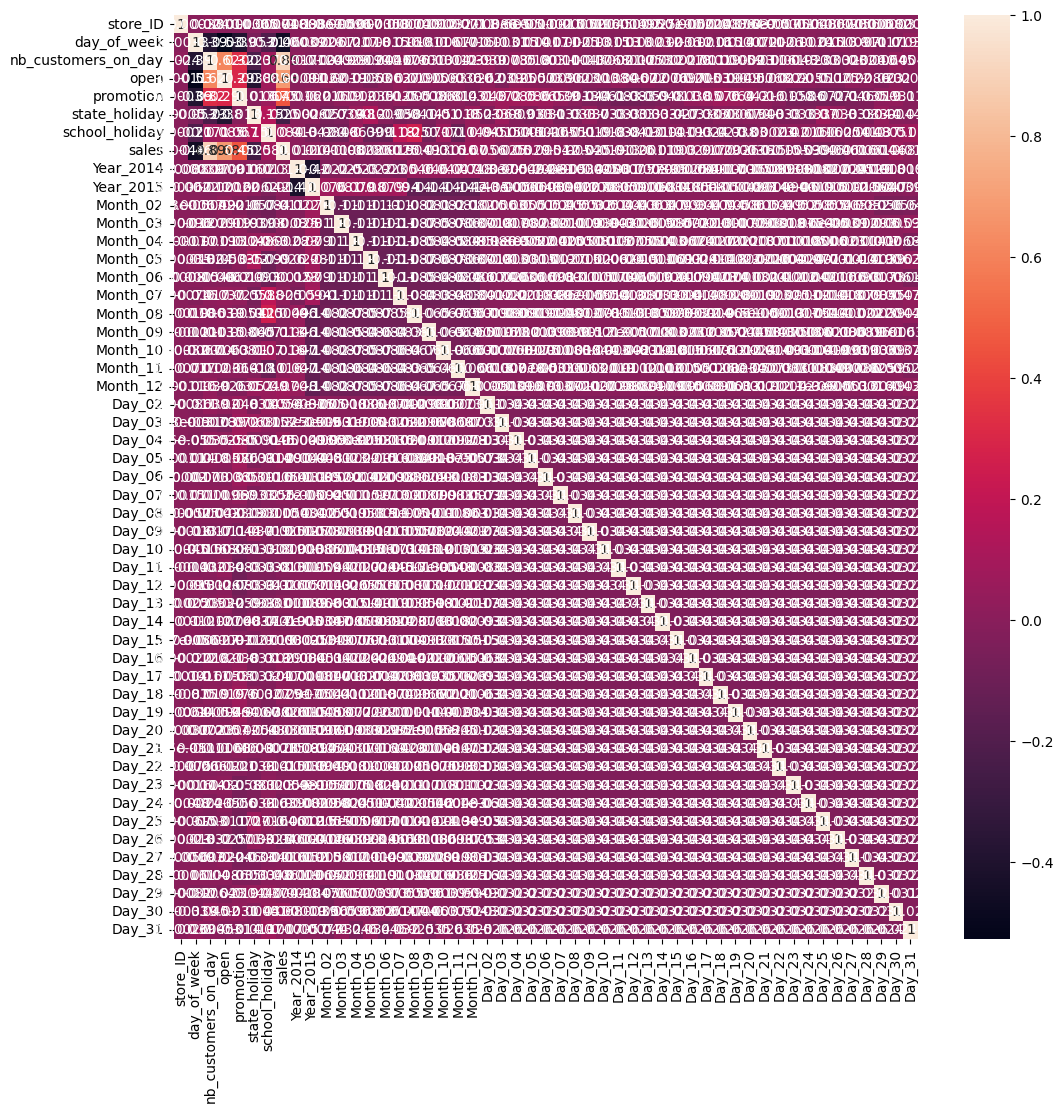

In [19]:
#analyzing correlations
plt.figure(figsize=(12,12))
sns.heatmap(sales.corr(),annot=True,cbar=True)

Creating Models

In [21]:
from sklearn.model_selection import train_test_split

X=sales.drop(['sales'],axis=1)
y=sales['sales']

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [23]:
#pip install xgboost
import xgboost as xgb

In [24]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [25]:
# Checking the score and if maybe overfitting
print(xgb_reg.score(X_test,y_test))
print(xgb_reg.score(X_train, y_train))

0.931760901824303
0.9355867952762194


In [ ]:
# Since the stores can be closed or open, we are now taking in consideration only open option because when it is close the predition will be 0

In [32]:
data_new = sales.loc[sales["open"]==1]

In [33]:
X2=data_new.drop(['sales'],axis=1)
y2=data_new['sales']

In [34]:
X2_train, X2_test, y2_train, y2_test=train_test_split(X2,y2,test_size=0.2,random_state=0)


In [35]:
xgb_reg2 = xgb.XGBRegressor()
xgb_reg2.fit(X2_train, y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
# Checking the score and overfitting
print(xgb_reg2.score(X2_test,y2_test))
print(xgb_reg2.score(X2_train, y2_train))

0.8702138065980487
0.8768813410787818


In [39]:
y_pred = xgb_reg.predict(X_test)

y_pred

array([4012.01    , 5010.3022  , 5872.977   , ..., 7643.091   ,
        -47.451107, 7342.489   ], dtype=float32)

In [40]:
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  1004.183653


LN Model

In [27]:
def Ridge_reg_train(X_train, y_train):
    # Takes the training X and y
    # Prints the accuracy
    # Returns the model

    from sklearn.linear_model import Ridge

    # initialize model
    model = Ridge()

    # fit model
    model.fit(X_train, y_train)

    print(model.coef_)
    print(model.intercept_)
    # check accuracy
    print('Training accuracy: ', model.score(X_train, y_train))
    return model

In [28]:
ridge_reg = Ridge_reg_train(X_train, y_train)

print('Test accuracy: ', ridge_reg.score(X_test, y_test))

[-1.42313578e-01 -8.07166106e+01  5.97849669e+00  1.56083656e+03
  1.24667128e+03 -9.40550599e+02  4.85034550e+01  7.30641887e+01
  2.73027490e+02  2.00027123e+01  9.68699088e+01  1.10720043e+02
  1.61841897e+02  1.91264114e+02  9.26145453e+01 -2.13346813e+01
 -4.67951318e+01 -4.08995756e+01  2.68122356e+02  9.73898303e+02
  3.36597058e+01 -1.65874675e+02 -1.33527823e+02 -2.72582318e+02
 -3.92731953e+02 -3.63961273e+02 -4.27710181e+02 -3.36847838e+02
 -4.06323833e+02 -4.68454773e+02 -3.95327522e+02 -2.84599965e+02
 -3.00454967e+02 -2.05829651e+02 -1.80470374e+02 -3.11565572e+02
 -2.75961264e+02 -4.18876482e+02 -3.80301319e+02 -4.41214269e+02
 -4.98304127e+02 -3.70261415e+02 -5.99909895e+02 -4.73597839e+02
 -3.97173831e+02 -2.46779299e+02 -1.48859952e+02 -6.31450716e+01
  3.06834399e+02  1.70696662e+02]
693.4666328258518
Training accuracy:  0.8595685685022216
Test accuracy:  0.8593589409837125


In [29]:
def Random_forest_reg_train(X_train, y_train):
    # Takes the training X and y
    # Prints the accuracy
    # Returns the model

    from sklearn.ensemble import RandomForestRegressor

    # initialize model
    model = RandomForestRegressor(n_estimators=1000, max_depth=10, max_leaf_nodes=400, n_jobs=-1)

    # fit model
    model.fit(X_train, y_train)


    # check accuracy
    print('Training accuracy: ', model.score(X_train, y_train))
    return model

In [30]:
Random_forest_reg = Random_forest_reg_train(X_train, y_train)

print('Test accuracy: ', Random_forest_reg.score(X_test, y_test))

KeyboardInterrupt: 

In [37]:
sales.to_csv('cleaned_sales.csv', index=False)

########### Choosing xgboost/xbgregressor 

In [41]:
import pickle

pickle.dump(xgb_reg, open('model.pkl', 'wb'))

In [47]:
final= pd.read_csv('validation_for students.csv')  # reading the final file 

In [48]:
final.dtypes


index                   int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
dtype: object

In [50]:
final.shape

(71205, 9)